In [ ]:
#importing neccessary libraries 
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random
import pandas as pd

In [ ]:
# Load dataset from CSV file
dataset = pd.read_csv('Mental_Health_FAQ.csv')

In [ ]:
dataset.head()

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [ ]:
# Extract questions, answers, and question IDs from the dataset
questions = dataset['Questions'].tolist()
answers = dataset['Answers'].tolist()
question_ids = dataset['Question_ID'].tolist()

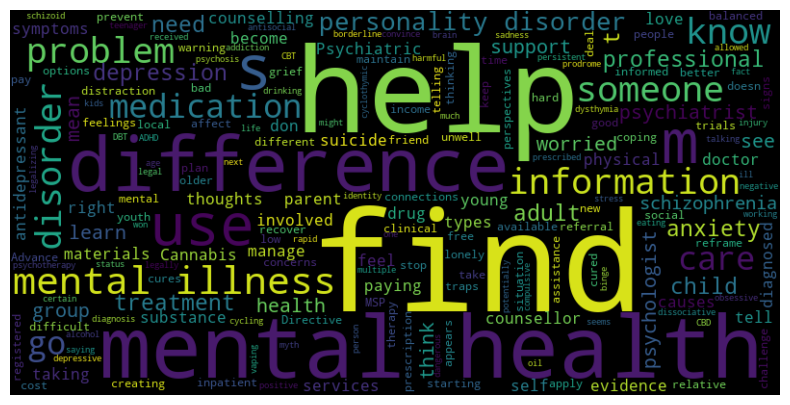

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'questions' is a list of strings containing the questions in your dataset
text = ' '.join(questions)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

In [ ]:
# Perform processing similar to the original code
documents = []
words = []
classes = []
ignore_words = ['?', '!']

for i in range(len(questions)):
    question = questions[i]
    answer = answers[i]
    question_id = question_ids[i]

    # Tokenize each word
    w = nltk.word_tokenize(question)
    words.extend(w)
    # Add documents to the corpus
    documents.append((w, question_id))

    # Add to the classes list
    if question_id not in classes:
        classes.append(question_id)
        
lemmatizer = WordNetLemmatizer()
# Lemmatize and lowercase each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# Sort classes
classes = sorted(list(set(classes)))
# Print information about the documents, classes, and words
print(len(documents), "documents")
print(len(classes), "classes", classes)
print(len(words), "unique lemmatized words", words)

98 documents
98 classes [1030153, 1043721, 1155199, 1259439, 1337085, 1511075, 1546812, 1585622, 1590140, 1619387, 1667863, 1706961, 1833460, 1896541, 1898078, 2009922, 2110618, 2115228, 2176317, 2447683, 2553795, 2554141, 2612846, 2746837, 2884887, 2903196, 2973656, 3055896, 3166337, 3221856, 3268009, 3284724, 3340726, 3388962, 3393534, 3597720, 3839472, 4031860, 4134858, 4181750, 4194958, 4197817, 4200873, 4211025, 4283807, 4294616, 4352464, 4373204, 4759773, 4816493, 4824231, 4893447, 4925221, 4962901, 5215843, 5343181, 5640861, 5778437, 5819325, 5981663, 6062232, 6085633, 6167248, 6361820, 6521784, 6623577, 6779222, 6851366, 6869967, 6981545, 7009409, 7069853, 7535002, 7657263, 7728364, 7760466, 7807643, 7984793, 7995219, 8022026, 8471978, 8612349, 8690253, 8904276, 8927672, 9020440, 9045344, 9049618, 9100298, 9167296, 9178453, 9250044, 9434130, 9539480, 9541219, 9630578, 9676742, 9679704]
259 unique lemmatized words ["''", "'m", "'s", '(', ')', ',', '.', '19+', '25', '``', 'a', 'a

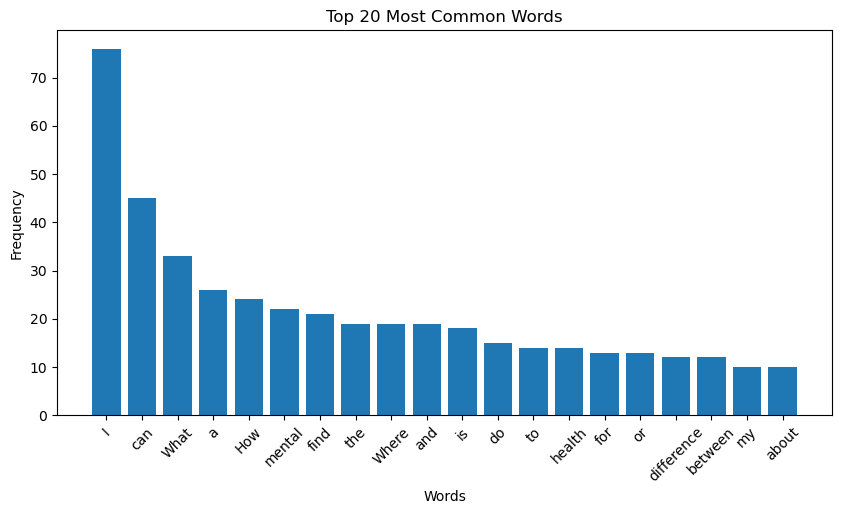

In [ ]:
from collections import Counter

# Assuming 'questions' is a list of question texts in your dataset
word_counts = Counter()
for question in questions:
    words = question.split()
    word_counts.update(words)

# Select the top N most common words
top_n = 20
common_words = dict(word_counts.most_common(top_n))

# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.bar(common_words.keys(), common_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Common Words')
plt.xticks(rotation=45)
plt.savefig('commonwords.png')
plt.show()

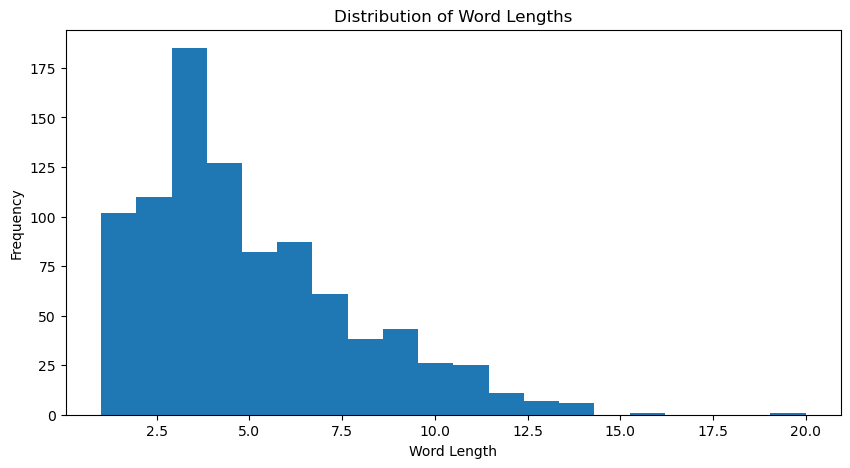

In [ ]:
# Assuming 'questions' is a list of question texts in your dataset
word_lengths = [len(word) for question in questions for word in question.split()]

# Plotting the histogram
plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=20)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths')
plt.savefig('wordlength.png')
plt.show()

In [ ]:
# Create our training data
training = []
output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [ ]:
# Shuffle and convert to numpy array
random.shuffle(training)
training = np.array(training, dtype=object)

In [ ]:
# Create train and test lists
train_x = list(training[:, 0])
train_y = list(training[:, 1])
print("Training data created")

Training data created


In [ ]:
# Create model
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [ ]:
# Compile model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)

Epoch 1/200
20/20 [==============================] - 1s 3ms/step - loss: 4.5889 - accuracy: 0.0000e+00
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 4.5766 - accuracy: 0.0000e+00
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 4.5701 - accuracy: 0.0102
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 4.5697 - accuracy: 0.0000e+00
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 4.5687 - accuracy: 0.0000e+00
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 4.5681 - accuracy: 0.0204
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 4.5476 - accuracy: 0.0204
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 4.5483 - accuracy: 0.0102
Epoch 9/200
20/20 [==============================] - 0s 3ms/step - loss: 4.5135 - accuracy: 0.0204
Epoch 10/200
20/20 [==============================] - 0s 3ms/step - loss: 4.5044 - accuracy: 

In [12]:
# Create model
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(len(train_x[0]),), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_y[0]), activation='softmax')
])

In [14]:
import tensorflow as tf
import numpy as np

# Define the optimizer
optimizer = tf.keras.optimizers.legacy.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=True)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

# Fit the model
history = model.fit(
    np.array(train_x),
    np.array(train_y),
    epochs=200,
    batch_size=5,
    verbose=1)

Epoch 1/200
20/20 [==============================] - 1s 3ms/step - loss: 4.5877 - accuracy: 0.0102
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 4.5918 - accuracy: 0.0306
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 4.5345 - accuracy: 0.0102
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 4.5226 - accuracy: 0.0204
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 4.4890 - accuracy: 0.0306
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 4.4344 - accuracy: 0.0816
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 4.3948 - accuracy: 0.0102
Epoch 8/200
20/20 [==============================] - 0s 4ms/step - loss: 4.3135 - accuracy: 0.0612
Epoch 9/200
20/20 [==============================] - 0s 4ms/step - loss: 4.2641 - accuracy: 0.0816
Epoch 10/200
20/20 [==============================] - 0s 5ms/step - loss: 4.1906 - accuracy: 0.0918
Epoch 11/

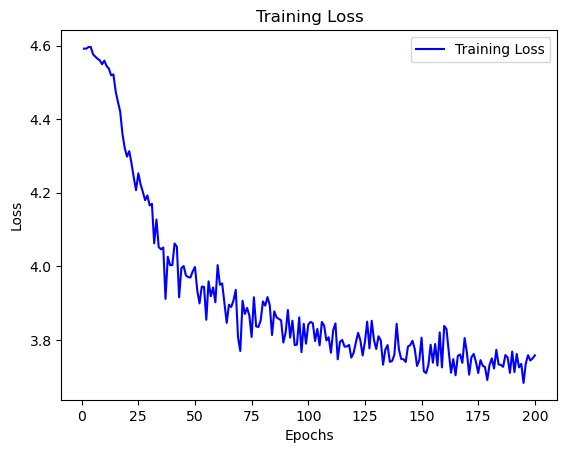

In [1]:
import matplotlib.pyplot as plt

# Get the loss history from the training
loss = hist.history['loss']

# Create a list of epochs to use as the x-axis
epochs = range(1, len(loss) + 1)

# Plot the loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


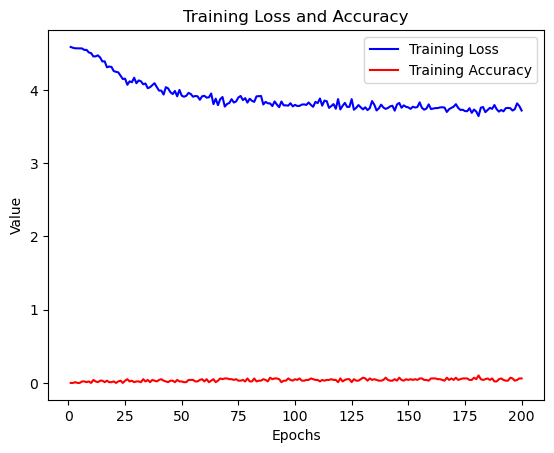

In [31]:
import matplotlib.pyplot as plt

# Get the training history
train_loss = hist.history['loss']
train_accuracy = hist.history['accuracy']

# Generate the x-axis values (epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the training loss and accuracy on the same graph
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

Epoch 1/200
16/16 [==============================] - 1s 20ms/step - loss: 4.5986 - accuracy: 0.0127 - val_loss: 4.5941 - val_accuracy: 0.0000e+00
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 4.5888 - accuracy: 0.0000e+00 - val_loss: 4.6130 - val_accuracy: 0.0000e+00
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 4.5945 - accuracy: 0.0000e+00 - val_loss: 4.6349 - val_accuracy: 0.0000e+00
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 4.5684 - accuracy: 0.0127 - val_loss: 4.6533 - val_accuracy: 0.0000e+00
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 4.5770 - accuracy: 0.0127 - val_loss: 4.6718 - val_accuracy: 0.0000e+00
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 4.5614 - accuracy: 0.0127 - val_loss: 4.6921 - val_accuracy: 0.0000e+00
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 4.5545 - accuracy: 0.0127 - val_loss: 4.7089 - v

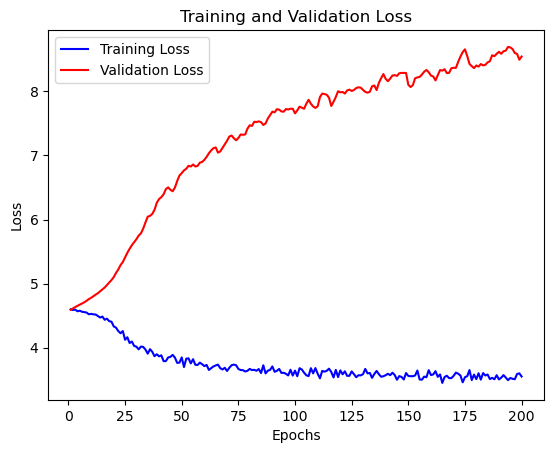

In [32]:
import matplotlib.pyplot as plt

# Split the training dataset into training and validation sets
validation_split = 0.2

num_validation_samples = int(validation_split * len(train_x))
train_x_partial = train_x[:-num_validation_samples]
train_y_partial = train_y[:-num_validation_samples]
val_x = train_x[-num_validation_samples:]
val_y = train_y[-num_validation_samples:]

# Create the model
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model and keep track of the training and validation loss
history = model.fit(np.array(train_x_partial), np.array(train_y_partial), validation_data=(np.array(val_x), np.array(val_y)),
                    epochs=200, batch_size=5, verbose=1)

# Plot the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Save the model
model.save('model.counsellor_new')
print("Model created")

INFO:tensorflow:Assets written to: model.counsellor_new\assets
Model created
